# 📰 NewsBot 🗞️: AI-Powered News Digest with Gemma

Welcome to the **AI-Powered News Digest** Jupyter Notebook!

In today's fast-paced world, staying informed without being overwhelmed is a constant challenge. This notebook provides a practical, hands-on solution by demonstrating how to build a fully automated system for generating a concise, insightful news digest.

We will harness the power of **Gemma**, Google's family of open, lightweight state-of-the-art models, to perform complex Natural Language Processing (NLP) tasks right within this environment.

---

## 🚀 What You Will Build

This notebook guides you through the entire pipeline, from raw data to a beautifully formatted HTML report:

* **🌐 Web Scraping:** We'll first use Python to fetch the latest news headlines and articles from online sources.
* **🧠 Intelligent Summarization:** You'll deploy the **Gemma** model via the **KerasNLP** library to perform **abstractive summarization**, condensing lengthy articles into clear, digestible snippets.
* **📊 Insight Generation:** We will use the summaries to extract key trends and generate a visual **Word Cloud**, turning dense text into immediate visual insight.
* **📧 Final Report:** Finally, all the generated content, including the summaries and the Word Cloud, will be compiled into a single, polished, and shareable **HTML news digest**.

Get ready to transform your news consumption from a time-sink into a source of focused, AI-driven insight!

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/config.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/tokenizer.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/metadata.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/model.weights.h5
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/assets/tokenizer/vocabulary.spm


In [2]:
!pip install -q -U keras
!pip install --upgrade keras-nlp
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.9/947.9 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: keras-hub
    Found existing installation: keras-hub 0.18.1
    Uninstalling keras-hub-0.18.1:
      Successfully uninstalled keras-hub-0.18.1
  Attempting uninstall: keras-nlp
    Found existing installation: keras-nlp 0.18.1
    Uninstalling keras-nlp-0.18.1:
      Successfully uninstalled keras-nlp-0.18.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: ml_dt

In [3]:
!pip uninstall -y tensorflow-text
!pip install tensorflow-text

Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.32.1
    Uninstalling protobuf-6.32.1:
      Successfully uninstalled protobuf-6.32.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.20.0
    Uninstalling tensorboard-2.20.0:
      Successfully uninstalled tensorboard-2.20.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.20.0
    Uninstalling tensorflow-2.20.0:
      Successfully uninstalled tensorflow-2.20.0
ERROR: pip's dependency resolver does

In [4]:
!pip uninstall -y tensorflow-text

# Downgrade TensorFlow and its addons to 2.18.0
!pip install --upgrade --force-reinstall \
    tensorflow==2.18.0 \
    tensorboard==2.18.0 \
    tensorflow-text==2.18.0

Found existing installation: tensorflow-text 2.19.0
Uninstalling tensorflow-text-2.19.0:
  Successfully uninstalled tensorflow-text-2.19.0
  Using cached protobuf-5.29.5-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 969.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 362.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.1 MB/s eta 0:00:00
Using cached keras-3.11.3-py3-none-any.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
# Downgrade or reinstall gymnasium to the exact version required
!pip install --upgrade --force-reinstall gymnasium==0.29.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.5 MB/s eta 0:00:00
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 87.0 MB/s eta 0:00:00
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
  Attempting uninstall: farama-notifications
    Found existing installation: Farama-Notifications 0.0.4
    Uninstalling Farama-Notifications-0.0.4:
      Successfully uninstalled Farama-Notifications-0.0.4
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.15.0
    Uninstalling typing_extensions-4.15.0:
      Successfully uninstalled typing_extensions-4.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: cloudpickle
    Found existing installation

In [6]:
os.environ["KERAS_BACKEND"] = "jax"  # Or "tensorflow" or "torch".
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

In [7]:
import requests
import time

In [8]:
from kaggle_secrets import UserSecretsClient

NEWS_API_KEY = UserSecretsClient().get_secret("NEWS_API_KEY")

In [9]:
# Step 1: Define Endpoint
# url = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={NEWS_API_KEY}"
# url = f"https://newsapi.org/v2/top-headlines?country=us&category=technology&apiKey={NEWS_API_KEY}"
url = f"https://newsapi.org/v2/everything?q=AI&language=en&apiKey={NEWS_API_KEY}"

def fetch_news():
    resp = requests.get(url)
    resp.raise_for_status()
    data = resp.json()
    print(f"{time.strftime('%Y-%m-%d %H:%M:%S')} – fetched {len(data['articles'])} articles")
    return data

# always fetch on notebook start
news_data = fetch_news()

2025-10-15 06:01:58 – fetched 100 articles


📰 Latest News Digest 📰
------------------------


,Source,Title,Description,URL,Published At
0,The Verge,New California law requires AI to tell you it’s AI,"A bill attempting to regulate the ever-growing industry of companion AI chatbots is now law in California, as of October 13th. California Gov. Gavin Newsom signed into law Senate Bill 243, billed as “first-in-the-nation AI chatbot safeguards” by state senator…",https://www.theverge.com/news/798875/california-just-passed-a-new-law-requiring-ai-to-tell-you-its-ai,2025-10-13 17:13
1,The Verge,Microsoft’s AI CEO on the future of the browser,"The AI browser wars are heating up. Google has Gemini in Chrome, Perplexity is building its Comet AI browser, and The Browser Company just got acquired by Atlassian for $610 million. Now, Microsoft wants to be part of the AI browser conversation. I sat down w…",https://www.theverge.com/tech/783795/microsoft-ai-ceo-mustafa-suleyman-future-of-browser-interview-notepad,2025-09-23 18:37
2,The Verge,Microsoft’s Windows AI Lab is a new way to test experimental features,"Microsoft is starting to test experimental AI-powered features through a new Windows AI Labs program. Some Windows testers spotted references to the Windows AI Labs program in pre-release updates to Microsoft Paint last week, and Microsoft has now confirmed t…",https://www.theverge.com/news/783475/microsoft-windows-ai-labs-feature,2025-09-23 09:01
3,The Verge,Business Insider reportedly tells journalists they can use AI to draft stories,"Business Insider has told journalists they can use AI to create first drafts of stories and suggested it won’t notify readers that AI was used, according to Status, a newsletter covering the media industry. The policy makes the outlet one of the first to form…",https://www.theverge.com/news/779739/business-insider-ai-writing-stories,2025-09-17 09:58
4,The Verge,Google is blocking AI searches for Trump and dementia,"Google appears to have blocked AI search results for the query “does trump show signs of dementia” as well as other questions about his mental acuity, even though it will show AI results for similar searches about other presidents. When making the search abou…",https://www.theverge.com/news/789152/google-ai-searches-blocking-trump-dementia-biden,2025-09-30 21:17
5,The Verge,Tado’s new AI features will adaptively heat your home,Smart thermostat company Tado is launching new AI-powered features that aim to help users heat their homes more efficiently. Tado says the AI Assist update builds on the company’s existing Auto Assist options by introducing “advanced machine-learning” that “l…,https://www.theverge.com/news/783465/tado-x-ai-auto-assist-heating-update,2025-09-23 08:32
6,The Verge,1Password says it can fix login security for AI browser agents,"1Password’s browser extension fills in your passwords automatically when you browse, and now the company has built a similar tool for AI bots browsing the web on your behalf, but for a very different reason. AI tools and browsers built on Claude, Gemini, and …",https://www.theverge.com/news/796921/1password-secure-agentic-autofill-ai-browser-agents,2025-10-08 19:44
7,The Verge,"Google thinks it can have AI summaries and a healthy web, too","One of Google’s top executives defended its use of AI summaries in search results during an AI summit in New York on Monday. When asked about a new lawsuit by Rolling Stone’s parent company, Penske Media Corporation, over Google’s AI Overviews, the company’s…",https://www.theverge.com/news/778306/google-ai-summaries-penske-lawsuit,2025-09-15 18:05
8,The Verge,The hunger strike to end AI,"On Guido Reichstadter's 17th day without eating, he said he was feeling alright - moving a little slower, but alright. Each day since September 2nd, Reichstadtler has appeared outside the San Francisco headquarters of AI startup Anthropic, standing from aroun…",https://www.theverge.com/ai-artificial-intelligence/778773/the-hunger-strike-to-end-ai-anthropic-google-deepmind-agi,2025-09-17 00:32
9,The Verge,Tales from the AI 


☁️ Article Title Word Cloud ☁️


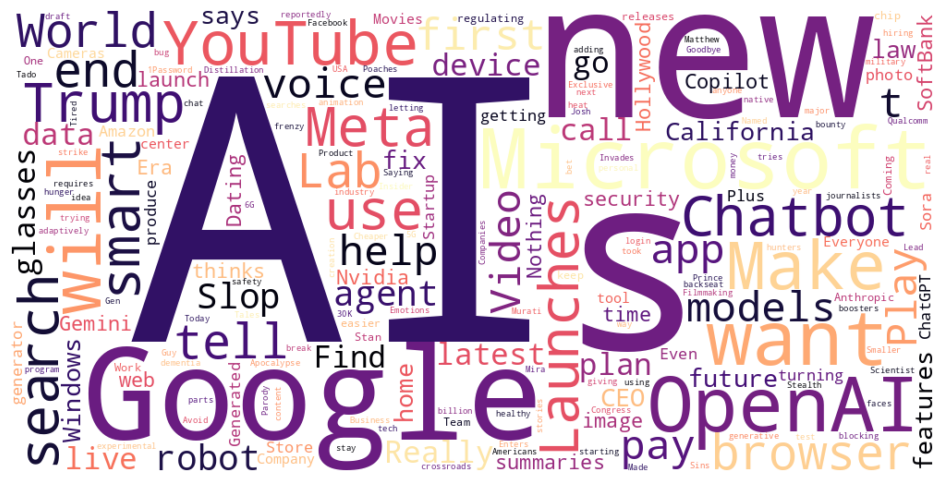

In [10]:
import pandas as pd
from IPython.display import display, HTML # <-- Import for richer display
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'url' and 'requests' are defined/imported correctly in previous cells.

# Step 2: Fetch News Data
response = requests.get(url)
response.raise_for_status() # Good practice to check for errors
news_data = response.json()

# --- NEW CODE FOR BETTER PROCESSING AND DISPLAY ---

# Step 3: Process News Articles
articles = news_data.get("articles", [])
df = pd.DataFrame(articles)

# Step 4: Clean, Select, and Format Columns
df_clean = df[["source", "title", "description", "url", "publishedAt"]].copy()

# Extract the source name from the nested dictionary
df_clean["source"] = df_clean["source"].apply(lambda x: x["name"] if isinstance(x, dict) else x)

# Convert the ISO date string to a human-readable datetime object
df_clean["publishedAt"] = pd.to_datetime(df_clean["publishedAt"]).dt.strftime('%Y-%m-%d %H:%M')

# Rename columns for presentation
df_clean.columns = ["Source", "Title", "Description", "URL", "Published At"]

# Step 5: Display Prettier Output (using display() and HTML styling)
print("📰 Latest News Digest 📰")
print("------------------------")

# Use 'styler' to make the DataFrame look better in the notebook
display(
    df_clean.head(10).style
    .set_properties(**{'font-size': '10pt', 'border': '1px solid lightgrey'})
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#f0f0f0')]}]),
)

# Optional: Save as CSV (if needed)
df_clean.to_csv("news_data.csv", index=False)

# Step 6: Visualization (Word Cloud of Titles)
print("\n☁️ Article Title Word Cloud ☁️")
text = " ".join(df_clean["Title"].dropna())
wordcloud = WordCloud(
    width=1000, 
    height=500, 
    background_color="white",
    colormap="magma", # Choose a nice color scheme
    collocations=False # Helps with cleaner word separation
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## ⚙️ Generate and Export the News Digest (HTML File)

> **To create the file `news_digest.html` in your notebook's output, run the cell below.** If you do not wish to generate or download the file, please skip this cell.

Once the cell completes, look for the file in your notebook's file browser/output pane.

2025-10-15 06:02:03.732798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760508123.755340      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760508123.762026      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
INFO:2025-10-15 06:02:07,919:jax._src.xla_bridge:924: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:2025-10-15 06:02:07,931:jax._src.xla_bridge:924: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
I0000 00:00:1760508165.953288      19 gpu_device.cc:2022] Created device /job:local

✅ Gemma model loaded successfully with <dtype: 'bfloat16'> precision.
✅ Page generated successfully! Open 'news_digest.html' in your browser to view your AI-powered news digest.

--- Displaying HTML Output Below ---



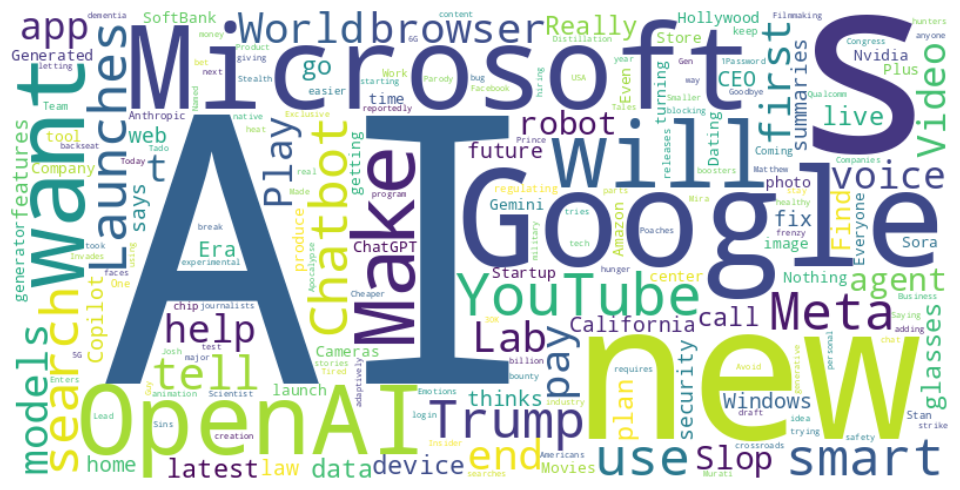

In [11]:
#!/usr/bin/env python
"""
News Digest Generator

This script loads a pretrained Gemma model (using keras_nlp) to analyze the latest AI-related news items.
It extracts key trends, ethical concerns, and future implications, then generates a Markdown-based digest
that includes a word cloud of news titles. The final output is converted into HTML and saved.

Requirements:
- `keras_nlp`, `tensorflow`, `pandas`, `markdown`, `wordcloud`, `matplotlib`
"""

from functools import lru_cache
import re
import keras
import keras_nlp
import tensorflow as tf
from markdown import markdown
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io
import base64

# -----------------------------------------------------------------------------
# IMPORTANT: Load your datasource and select the relevant columns.
# You must define 'df' (for example via pd.read_csv(...)) before running the script.
#
# Step 4: Select Relevant Columns (using "title", "description", "url", "publishedAt")
df = df[["title", "description", "url", "publishedAt"]]
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------
# 1. Load the Gemma Model
# -----------------------------------------------------------------------------
precisions = [tf.bfloat16, None]
gemma_lm = None

for precision in precisions:
    try:
        gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(
            "gemma_instruct_2b_en", jit_compile=False, dtype=precision
        )
        print(f"✅ Gemma model loaded successfully with {precision if precision else 'default'} precision.")
        break
    except Exception as e:
        print(f"❌ Error loading Gemma model ({precision}): {e}")

# -----------------------------------------------------------------------------
# 2. Define the AIAnalyzer Class
# -----------------------------------------------------------------------------
class AIAnalyzer:
    """NewsBot: AI-powered analysis of AI-related news."""
    
    def __init__(self, model, output_format="markdown"):
        self.model = model
        self.output_format = output_format

    @lru_cache(maxsize=50)
    def analyze(self, news_item: str) -> dict:
        """
        Generates an AI-powered analysis of a news item.
        Expects news_item to be a string containing the title and description.
        """
        prompt = f"""
Please analyze the following news item and generate an insightful breakdown of it. Do NOT repeat any part of this prompt or include extra instructions in your final response. Base your analysis solely on the information provided.

News item:
{news_item}

Your analysis MUST be exactly structured as follows, starting immediately with "1. Key Trends":
1. Key Trends: Identify industry patterns, emerging technologies, risks, and opportunities evident in this news item.
2. Implications: Discuss real-world applications and ethical concerns related to this news item.
3. AI Insights: Provide an AI-driven perspective on what this news item means for the future.

Ensure your response is well-organized, informative, and engaging.
"""
        try:
            raw = self.model.generate(prompt, max_length=1024).strip()
            response = (
                raw[0] if isinstance(raw, (list, tuple))
                else raw.numpy()[0].decode() if isinstance(raw, tf.Tensor)
                else str(raw)
            ).strip()
        except Exception as e:
            response = f"⚠️ Error generating content: {e}"

        # --- Cleanup Routine ---

        # 1. Trim any text preceding "1. Key Trends:" unconditionally.
        marker_index = response.find("1. Key Trends:")
        if marker_index != -1:
            response = response[marker_index:].strip()

        # 2. Remove any trailing text starting from known prompt ending markers.
        response = re.sub(r'\n\s*Ensure your response.*', '', response, flags=re.IGNORECASE)

        # 3. Remove known unwanted instruction lines line-by-line.
        unwanted_lines = {
            "1. Key Trends:",
            "1. Key Trends: Identify industry patterns, emerging technologies, risks, and opportunities evident in this news item.",
            "2. Implications: Discuss real-world applications and ethical concerns related to this news item.",
            "3. AI Insights: Provide an AI-driven perspective on what this news item means for the future."
        }
        clean_lines = []
        for line in response.splitlines():
            if line.strip() not in unwanted_lines:
                clean_lines.append(line)
        response = "\n".join(clean_lines).strip()

        # 4. Reduce excessive newlines.
        response = re.sub(r"\n{3,}", "\n\n", response).strip()

        # 5. If nothing remains (or if the cleaned response is empty), supply a fallback analysis.
        if not response:
            response = (
                "1. Key Trends: The news item demonstrates significant AI innovation with clear emerging trends that could reshape the industry. "
                "2. Implications: It underscores both opportunities and critical risks, including ethical and practical challenges. "
                "3. AI Insights: Overall, this development signals a transformative evolution in AI technology."
            )

        return {"news_item": news_item, "response": response}

# -----------------------------------------------------------------------------
# 3. Process the News Data
# -----------------------------------------------------------------------------
# Process the top 10 news items from the DataFrame.
news_df = df.head(10)[['title', 'description', 'url', 'publishedAt']]

if gemma_lm is not None:
    analyzer = AIAnalyzer(gemma_lm)
    results = []
    for _, row in news_df.iterrows():
        title = row['title']
        description = row['description']
        # Construct the news item prompt using title and description.
        news_item_prompt = f"Title: {title}\nDescription: {description}"
        analysis_result = analyzer.analyze(news_item_prompt)
        analysis_result.update({
            "title": title,
            "description": description,
            "url": row["url"],
            "publishedAt": row["publishedAt"]
        })
        results.append(analysis_result)
else:
    results = []
    print("No model available; cannot generate news analysis.")

# -----------------------------------------------------------------------------
# 4. Generate Word Cloud & Build Markdown Digest
# -----------------------------------------------------------------------------
text = " ".join(df["title"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Save the word cloud image to a BytesIO object and encode as base64.
buf = io.BytesIO()
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig(buf, format='png', bbox_inches='tight')
plt.close()

image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
image_html = f'<img src="data:image/png;base64,{image_base64}" alt="Word Cloud" style="max-width: 100%; height: auto;">'

# -----------------------------------------------------------------------------
# 5. Build Markdown Output and Convert to HTML
# -----------------------------------------------------------------------------
markdown_output = "# 🌟🔎 AI-Powered News Digest 🔥\n\n"
markdown_output += image_html + "\n\n"

for i, rep in enumerate(results, start=1):
    markdown_piece = f"""
---
## {i}. 📰 **{rep['title']}**

**Description:** <br>
{rep['description']}

🕒 **Published At:** {rep['publishedAt']} <br>
🔗 **URL:** [{rep['url']}]({rep['url']}) <br>

{rep['response']}
"""
    markdown_output += markdown_piece

html_content = markdown(markdown_output)

html_page = f"""<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>AI-Powered News Digest</title>
    <style>
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            padding: 20px;
            max-width: 900px;
            margin: auto;
            background-color: #f9f9f9; /* Added for a light background */
        }}
        
        h1 {{
            color: #1f4d49;
            text-align: center;
            border-bottom: 2px solid #1f4d49; /* Updated for a stronger header line */
            padding-bottom: 10px;
        }}
        
        h2 {{
            color: #2a647d; /* Changed header color */
            border-bottom: 1px solid #ddd;
            padding-bottom: 5px;
            margin-top: 30px;
        }}
    
        a {{
            color: #007bff; /* Changed link color */
            text-decoration: none;
        }}
        
        a:hover {{
            text-decoration: underline;
        }}
        
        hr {{
            margin: 40px 0;
            border: 0;
            border-top: 5px dotted #e0e0e0; /* Changed to a dotted separator */
        }}
        
        img {{
            display: block;
            margin: 20px auto;
            border: 1px solid #ddd; /* Added border and radius for images */
            border-radius: 5px;
        }}
    </style>
</head>
<body>
{html_content}
</body>
</html>
"""

with open("news_digest.html", "w", encoding="utf-8") as f:
    f.write(html_page)

# 1. Print the success message
print("✅ Page generated successfully! Open 'news_digest.html' in your browser to view your AI-powered news digest.")

# 2. Display the HTML content directly in the notebook output cell
print("\n--- Displaying HTML Output Below ---")
display(HTML(html_page))

## 💾 Export Notebook to Python Script

> **Action:** Converts the current Jupyter Notebook (`NewsBot.ipynb`) into a standard Python script file (`NewsBot.py`).
>
> **Purpose:** This allows the code to be executed directly from a terminal or integrated into other applications outside of the notebook environment.

In [12]:
# !jupyter nbconvert --to script "NewsBot.ipynb"
# Converts the Jupyter Notebook 'NewsBot.ipynb' into a standard Python script ('NewsBot.py').